---
# CLASIFICIACIÓN Y DETECCIÓN DE SEÑALES DE TRÁFICO EN IMÁGENES
---
<img src="https://raw.githubusercontent.com/muddassir235/German-Traffic-Sign-Classifier/master/Files/conv_net.png" alt="Drawing" style="width: 512px;"/>

## INTRODUCCIÓN:
Este trabajo de Visión Artificial trata de abordar el siguiente problema: reconocer señales de tráfico por medio de inteligencia artificial


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dataset import ProgressBar
import cv2
np.random.seed(42) # Los más "frikis" lo entenderán

---
## PARTE 1:
Se ha de implementar un metodo de clasificación basado en vectores de características HOG usando técnicas aprendidas a lo largo de la asignatura, además de haciendo uso de distintos clasificadores como CNN, SVM, ensembles, random forests, etc.


### Recogida de datos

In [2]:
import dataset as ds
import preprocess as prep
from sklearn.model_selection import train_test_split as TTSplit

imgSizeH = 83
imgSizeW = 83

color = False
X, y = ds.create_dataset('Dataset_traffic_sign/', COLOR=color, IMG_HEIGHT=imgSizeH, IMG_WIDTH=imgSizeW)
image_data_train, image_data_test, class_name_train, class_name_test = TTSplit(X, y, test_size=0.30, random_state=42, stratify=y)
image_data_test, image_data_val, class_name_test, class_name_val = TTSplit(image_data_test, class_name_test, test_size=0.5, random_state=42, stratify=class_name_test)
print("Elementos en cada partición:")
print("Train: %d\nTest: %d\nVal: %d\n" % (len(class_name_train), len(class_name_test), len(class_name_val)))
print("Clases en cada partición:")
print("Train: %d\nTest: %d\nVal: %d" % (np.unique(class_name_train).size, np.unique(class_name_test).size, np.unique(class_name_val).size))


Número de clases:  43
Número total de imágenes:  1264
Generating [############################################################>] 100 %

Elementos en cada partición:
Train: 884
Test: 190
Val: 190

Clases en cada partición:
Train: 43
Test: 43
Val: 43


### Procesado de imagenes

In [3]:
image_data_train = prep.processImages(image_data_train, sobel=False, eq=False, gauss=False, amp=False)
image_data_val = prep.processImages(image_data_val, sobel=False, eq=False, gauss=False, amp=False)
image_data_test = prep.processImages(image_data_test, sobel=False, eq=False, gauss=False, amp=False)
class_name_train, class_name_test, class_name_val = np.array(class_name_train), np.array(class_name_test), np.array(class_name_val)

Processing [############################################################>] 100 %

Processing [############################################################>] 100 %

Processing [############################################################>] 100 %



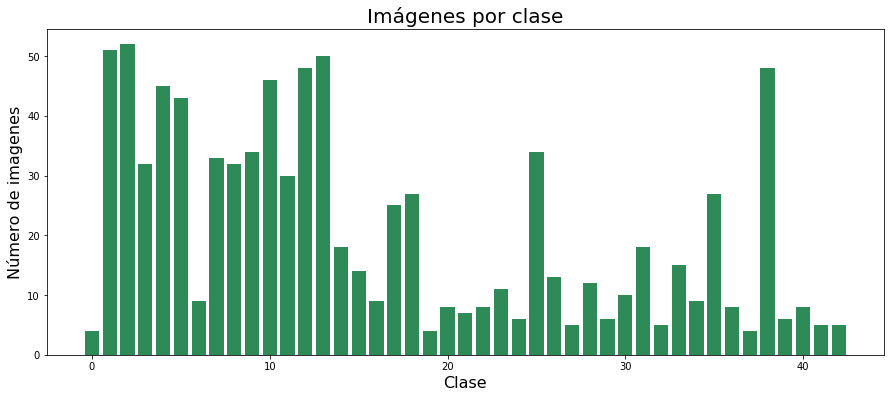

In [4]:
numClases = np.unique(class_name_train).size
ejemPorClaseTrain = np.zeros(numClases)
for i in range(numClases):
    ejemPorClaseTrain[i] = np.sum(i == class_name_train)
plt.figure(figsize=(15,6))
plt.bar(np.arange(0,numClases), ejemPorClaseTrain, color="seagreen")
plt.title("Imágenes por clase", size=20)
plt.xlabel("Clase", size=16)
plt.ylabel("Número de imagenes", size=16);

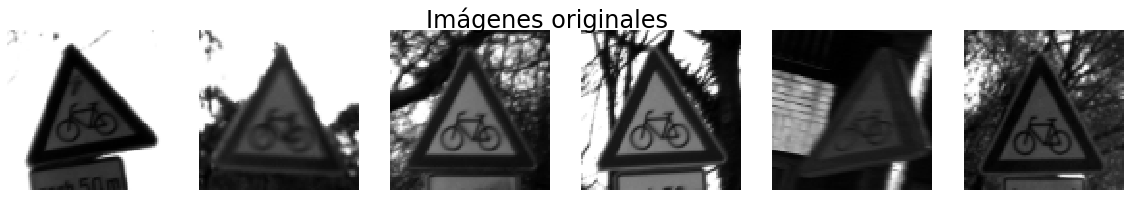

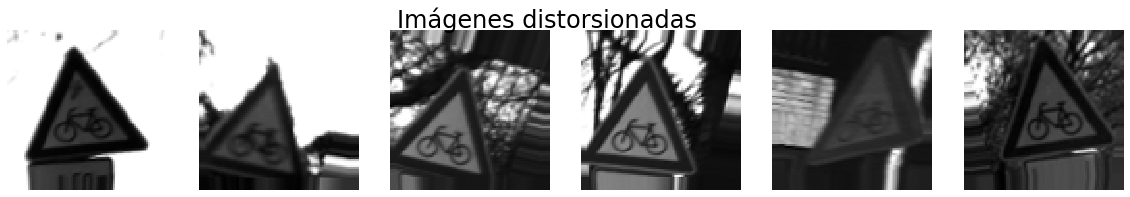

In [5]:
clase = 29
fig, axes = plt.subplots(1,int(ejemPorClaseTrain[clase]),figsize=(20,3))
fig2, axes2 = plt.subplots(1,int(ejemPorClaseTrain[clase]),figsize=(20,3))
fig.suptitle("Imágenes originales", size=24)
fig2.suptitle("Imágenes distorsionadas", size=24)

images = image_data_train[np.where(class_name_train == clase)]
warpImgs = prep.imageDistortion(images)
for i in range(int(ejemPorClaseTrain[clase])):
    if color:
        axes[i].imshow(images[i,:,:,::-1])
        axes2[i].imshow(warpImgs[i,:,:,::-1])
    else:
        axes[i].imshow(images[i], cmap=plt.cm.gray)
        axes2[i].imshow(warpImgs[i], cmap=plt.cm.gray)
    axes[i].axis('off')
    axes2[i].axis('off')

### Balanceado de clases <u style="color: red;">(no se usa) 
Visto lo desbalanceadas que están las clases, se ha decidido hacer un oversampling de la siguiente manera:
$$\Delta x_{c_i} = \frac{\max(n_x)-n_{x_{c_i}}}{n_{x_{c_i}}}$$
Lo único que se hace aquí es restar el número máximo de imágenes de entre todas las clases con el número de elementos de la clase i y dividir esto por el número de elementos de la clase i.

Para aumentar el número de imágenes se utiliza un metodo de distorsión de imágenes 

In [ ]:
# for i in range(numClases):
#     images_clase = image_data_train[np.where(i == class_name_train)]
# #     if ejemPorClaseTrain[i] < 8:
# #         samples = 5 # quedarán 5*ejemPorClase
# #     if ejemPorClaseTrain[i] < 15:
# #         samples = 3 # quedarán 4*ejemPorClase
# #     elif ejemPorClaseTrain[i] < 30:
# #         samples = 1 # quedarán 2*ejemPorClase
# #     else:
# #         samples = 0 # quedarán los mismos ejemPorClase
#     samples = int(np.max(ejemPorClaseTrain) - ejemPorClaseTrain[i]) // int(ejemPorClaseTrain[i])
#     for j in range(samples):
#         image_data_train = np.vstack((image_data_train, prep.imageDistortion(images_clase)))
#         class_name_train = np.hstack((class_name_train, np.full(int(ejemPorClaseTrain[i]), i)))

In [ ]:
# numClases = np.unique(class_name_train).size
# ejemPorClaseTrain = np.zeros(numClases)
# for i in range(numClases):
#     ejemPorClaseTrain[i] = np.sum(i == class_name_train)
# plt.figure(figsize=(15,6))
# plt.bar(np.arange(0,numClases), ejemPorClaseTrain, color="seagreen")
# plt.title("Imágenes por clase", size=20)
# plt.xlabel("Clase", size=16)
# plt.ylabel("Número de imagenes", size=16);

### Muestra de imagenes
A continuación se muestran algunas imagenes aleatorias de cada dataset de imagenes. En orden de filas: `train`, `validación` y `test`

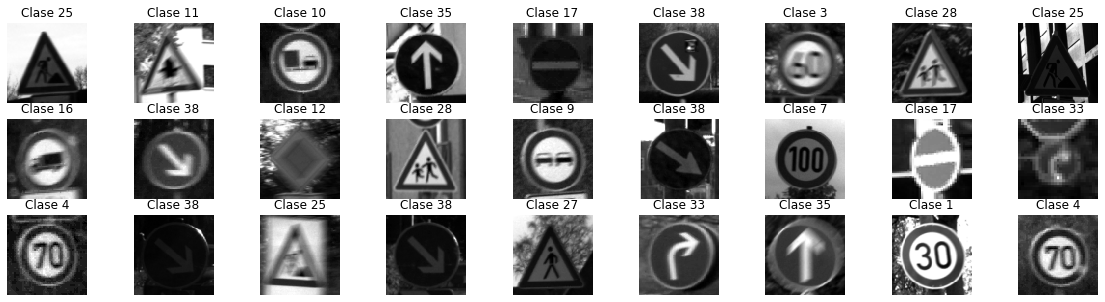

In [6]:
numImgs = image_data_test.shape[0]
numPicle = 9 # More than 9 doesn't work so be carefull
randImgs = np.random.choice(numImgs, size=numPicle, replace=False)
selectedImgsTrain = image_data_train[randImgs]
selectedImgsVal = image_data_val[randImgs]
selectedImgsTest = image_data_test[randImgs]
selectedClassTrain = class_name_train[randImgs]
selectedClassVal = class_name_val[randImgs]
selectedClassTest = class_name_test[randImgs]
fig, axes = plt.subplots(3,numPicle, figsize=(20,5))
# fig.suptitle("TRAIN | VAL | TEST", fontsize=16)
for i in range(numPicle):
    if color:
        axes[0,i].imshow(selectedImgsTrain[i,:,:,::-1])
        axes[0,i].set_title("Clase %d" %selectedClassTrain[i])
        axes[1,i].imshow(selectedImgsVal[i,:,:,::-1])
        axes[1,i].set_title("Clase %d" %selectedClassVal[i])
        axes[2,i].imshow(selectedImgsTest[i,:,:,::-1])
        axes[2,i].set_title("Clase %d" %selectedClassTest[i])
    else:
        axes[0,i].imshow(selectedImgsTrain[i], cmap=plt.cm.gray)
        axes[0,i].set_title("Clase %d" %selectedClassTrain[i])
        axes[1,i].imshow(selectedImgsVal[i], cmap=plt.cm.gray)
        axes[1,i].set_title("Clase %d" %selectedClassVal[i])
        axes[2,i].imshow(selectedImgsTest[i], cmap=plt.cm.gray)
        axes[2,i].set_title("Clase %d" %selectedClassTest[i])
    axes[0,i].axis('off')
    axes[1,i].axis('off')
    axes[2,i].axis('off')
    

### Calculo de features de HOG
Calculamos las caraterísticas de HOG de los tres datasets.

In [4]:
def getHOG(img_data, winSize=(64,64), blockSize=(32,32), blockStride=(8,8), cellSize=(8,8), nBins=9, derivAperture=1,\
           winSigma=4., histogramNormType=0, L2HisThreshold=2e-01, gammaCorrection=0, nLevels=64, winStride=(10,10), \
           padding=(8,8), locations=((10,10),)):
    
    from skimage import exposure
    from skimage import feature
    if len(img_data.shape) < 3:
        img_data = img_data.reshape((1,img_data.shape[0], img_data.shape[1]))
        
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nBins,derivAperture,winSigma,
                            histogramNormType,L2HisThreshold,gammaCorrection,nLevels)
    H = hog.compute(img_data[0],winStride,padding,locations)

    hogImg_hist = np.zeros((img_data.shape[0], H.shape[0]))
    
    for i in range(img_data.shape[0]):
        img = np.uint8(img_data[i])
        H = hog.compute(img, winStride,padding,locations)

        hogImg_hist[i] = H.ravel()
    return hogImg_hist


In [5]:
# Obtenemos los histogramas y las imagenes pasadas por HOG
hogImg_hist_train = getHOG(image_data_train, nBins=9)
hogImg_hist_val = getHOG(image_data_val, nBins=9)
hogImg_hist_test = getHOG(image_data_test, nBins=9)


### Estandarización de datos <u style="color: red;">(no se usa)
Antes de entrenar a cualquier modelo estandarizamos los datos.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# MinMaxScalerHogFeat = MinMaxScaler()
# hogImg_hist_train = MinMaxScalerHogFeat.fit_transform(hogImg_hist_train)

# hogImg_hist_val = MinMaxScalerHogFeat.transform(hogImg_hist_val)
# hogImg_hist_test = MinMaxScalerHogFeat.transform(hogImg_hist_test)


---
## MODELOS


### Entrenamiento de un modelo SVM
Se hace uso de un modelo SVM para el entrenamiento.

In [7]:
from sklearn import svm

clf_SC = svm.SVC(kernel='linear', C=100, gamma=0.1, max_iter = 1000)
%time clf_SC.fit(hogImg_hist_train, class_name_train)

Wall time: 2.88 s


SVC(C=100, gamma=0.1, kernel='linear', max_iter=1000)

Ahora probamos el modelo con los datasets de `train`, `validación` y `test` para ver los resultados. Pero antes estandarizamos los datos de `validación` y `test`

In [8]:
%time accTrain = clf_SC.score(hogImg_hist_train, class_name_train)
%time accVal = clf_SC.score(hogImg_hist_val, class_name_val)
%time accTest = clf_SC.score(hogImg_hist_test, class_name_test)


Wall time: 3.24 s
Wall time: 675 ms
Wall time: 705 ms


In [9]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9947368421052631
Test:    0.9631578947368421


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [10]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_SVM_TSC%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_SVM_TSC06_01_2021_19-18-28.joblib']

###  Entrenamiento de un modelo NN  

Se hace uso de un modelo NN para el entrenamiento.

In [11]:
from sklearn.neural_network import MLPClassifier

clf_SC = MLPClassifier(solver='adam', alpha=1e-2,hidden_layer_sizes=(16, 32, 64), random_state=1)
%time clf_SC.fit(hogImg_hist_train, class_name_train)


Wall time: 11.6 s


MLPClassifier(alpha=0.01, hidden_layer_sizes=(16, 32, 64), random_state=1)

In [12]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SC.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SC.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SC.predict(hogImg_hist_test), class_name_test)


Wall time: 10.1 ms
Wall time: 10.9 ms
Wall time: 4 ms


In [13]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9578947368421052
Test:    0.9421052631578948


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [14]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_NN_TSC%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_NN_TSC06_01_2021_19-18-50.joblib']

###  Entrenamiento de un modelo CNN  

Se hace uso de un modelo CNN para el entrenamiento.

In [8]:
CNN_train_imgs = np.copy(image_data_train)
CNN_val_imgs = np.copy(image_data_val)
CNN_test_imgs = np.copy(image_data_test)
if color == False:
    CNN_train_imgs = CNN_train_imgs.reshape(np.hstack((CNN_train_imgs.shape, 1)))
    CNN_val_imgs = CNN_val_imgs.reshape(np.hstack((CNN_val_imgs.shape, 1)))
    CNN_test_imgs = CNN_test_imgs.reshape(np.hstack((CNN_test_imgs.shape, 1)))

In [12]:
import importlib.util
 
if importlib.util.find_spec('tensorflow') is None:
    !pip install tensorflow
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
 
num_classes = 43
num_rgb = len(CNN_train_imgs[0].shape)
 
model_SC = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=CNN_train_imgs[0].shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
  layers.Dense(num_classes)
])
model_SC.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 83, 83, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 83, 83, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 41, 41, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)       

In [15]:
model_SC.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
%time history = model_SC.fit(CNN_train_imgs, class_name_train, epochs=35, validation_data=(CNN_val_imgs, class_name_val))

Epoch 1/35
28/28 [==============================] - 7s 233ms/step - loss: 0.9954 - accuracy: 0.7602 - val_loss: 1.1507 - val_accuracy: 0.7316
Epoch 2/35
28/28 [==============================] - 6s 230ms/step - loss: 0.8700 - accuracy: 0.8032 - val_loss: 1.1514 - val_accuracy: 0.7316
Epoch 3/35
28/28 [==============================] - 6s 231ms/step - loss: 0.8494 - accuracy: 0.7930 - val_loss: 1.2165 - val_accuracy: 0.7211
Epoch 4/35
28/28 [==============================] - 6s 231ms/step - loss: 0.8286 - accuracy: 0.8167 - val_loss: 1.0211 - val_accuracy: 0.7474
Epoch 5/35
28/28 [==============================] - 6s 227ms/step - loss: 0.8046 - accuracy: 0.8348 - val_loss: 1.1411 - val_accuracy: 0.7263
Epoch 6/35
28/28 [==============================] - 6s 227ms/step - loss: 0.7265 - accuracy: 0.8507 - val_loss: 0.9368 - val_accuracy: 0.8053
Epoch 7/35
28/28 [==============================] - 6s 227ms/step - loss: 0.7038 - accuracy: 0.8733 - val_loss: 0.9677 - val_accuracy: 0.7632
Epoch 

28/28 - 2s - loss: 0.2919 - accuracy: 0.9955
Wall time: 2.09 s
6/6 - 0s - loss: 0.7845 - accuracy: 0.8368
Wall time: 466 ms
6/6 - 0s - loss: 0.9512 - accuracy: 0.8263
Wall time: 484 ms
Porcentajes de acierto del modelo
Train:   0.9954751133918762
Val:     0.8368421196937561
Test:    0.8263157606124878


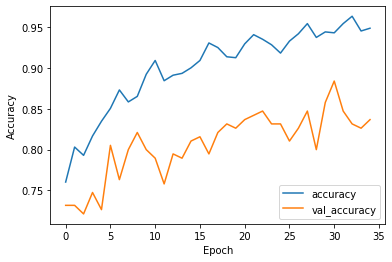

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

%time lossTrain, accTrain = model_SC.evaluate(CNN_train_imgs,  class_name_train, verbose=2)
%time lossVal, accVal = model_SC.evaluate(CNN_val_imgs,  class_name_val, verbose=2)
%time lossTest, accTest = model_SC.evaluate(CNN_test_imgs,  class_name_test, verbose=2)
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


###  Entrenamiento de un modelo Random Forest  

Se hace uso de un modelo Random Forest para el entrenamiento.

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_SC = RandomForestClassifier(criterion='gini', n_estimators=150)
%time clf_SC.fit(hogImg_hist_train, class_name_train)

Wall time: 10.3 s


RandomForestClassifier(n_estimators=150)

In [21]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SC.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SC.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SC.predict(hogImg_hist_test), class_name_test)


Wall time: 147 ms
Wall time: 34 ms
Wall time: 42 ms


In [22]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9789473684210527
Test:    0.9526315789473684


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [23]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_RF_TSC%s.joblib' % daclf_SCtetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_RF_TSC06_01_2021_19-25-01.joblib']

###  Entrenamiento de un modelo OVA

Se hace uso de un modelo OVA para el entrenamiento.

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Se llama al constructor de OVA utilizando SVM como clasificador base
clf_SC = OneVsRestClassifier(SVC(kernel='linear', C=100, gamma=0.1, max_iter = 1000))
# Se entrena el modelo OVA
%time clf_SC.fit(hogImg_hist_train, class_name_train)

Wall time: 10.8 s


OneVsRestClassifier(estimator=SVC(C=100, gamma=0.1, kernel='linear',
                                  max_iter=1000))

In [25]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SC.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SC.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SC.predict(hogImg_hist_test), class_name_test)


Wall time: 8.58 s
Wall time: 1.84 s
Wall time: 1.8 s


In [26]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     1.0
Test:    0.9631578947368421


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [27]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_OVA_TSC%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_OVA_TSC06_01_2021_19-25-47.joblib']

###  Entrenamiento de un modelo OVO

Se hace uso de un modelo OVO para el entrenamiento.

In [28]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

# Se llama al constructor de OVA utilizando SVM como clasificador base
clf_SC = OneVsOneClassifier(SVC(kernel='linear', C=100, gamma=0.1, max_iter = 1000))
# Se entrena el modelo OVA
%time clf_SC.fit(hogImg_hist_train, class_name_train)

Wall time: 5.04 s


OneVsOneClassifier(estimator=SVC(C=100, gamma=0.1, kernel='linear',
                                 max_iter=1000))

In [29]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SC.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SC.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SC.predict(hogImg_hist_test), class_name_test)


Wall time: 1min 58s
Wall time: 24.7 s
Wall time: 24.5 s


In [30]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9947368421052631
Test:    0.9578947368421052


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [31]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_OVO_TSC%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_OVO_TSC06_01_2021_19-28-44.joblib']

###  Entrenamiento de un modelo Decision Tree

Se hace uso de un modelo Decision Tree para el entrenamiento.

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Se llama al constructor de OVA utilizando SVM como clasificador base
clf_SC = DecisionTreeClassifier(criterion='entropy', random_state=1)
# Se entrena el modelo OVA
%time clf_SC.fit(hogImg_hist_train, class_name_train)

Wall time: 22.1 s


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [33]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SC.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SC.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SC.predict(hogImg_hist_test), class_name_test)


Wall time: 17 ms
Wall time: 5 ms
Wall time: 4 ms


In [34]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.7526315789473684
Test:    0.7578947368421053


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [35]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_DT_TSC%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_DT_TSC06_01_2021_19-33-05.joblib']

###  Entrenamiento de un modelo Naïve-Bayes

Se hace uso de un modelo Naïve-Bayes para el entrenamiento.

In [36]:
from sklearn import naive_bayes
# Se llama al constructor de OVA utilizando SVM como clasificador base
clf_SC = naive_bayes.GaussianNB()
# Se entrena el modelo OVA
%time clf_SC.fit(hogImg_hist_train, class_name_train)

Wall time: 94 ms


GaussianNB()

In [37]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SC.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SC.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SC.predict(hogImg_hist_test), class_name_test)


Wall time: 2.65 s
Wall time: 561 ms
Wall time: 588 ms


In [38]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   0.9864253393665159
Val:     0.9421052631578948
Test:    0.868421052631579


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [39]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_GNB_TSC%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_GNB_TSC06_01_2021_19-33-38.joblib']

###  Entrenamiento de un modelo LDA

Se hace uso de un modelo LDA para el entrenamiento.

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Se llama al constructor de LDA
clf_SC = LinearDiscriminantAnalysis()
# Se entrena el modelo
%time clf_SC.fit(hogImg_hist_train, class_name_train)

Wall time: 1.87 s


LinearDiscriminantAnalysis()

In [41]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SC.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SC.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SC.predict(hogImg_hist_test), class_name_test)


Wall time: 17 ms
Wall time: 4 ms
Wall time: 4 ms


In [42]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9894736842105263
Test:    0.9526315789473684


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [43]:
from joblib import dump, load
from datetime import datetime
dump(clf_SC, 'Modelos/model_LDA_TSC%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_LDA_TSC06_01_2021_19-34-03.joblib']

## <u>Conclusión</u>

​	Así pues, viendo los datos anteriores, el mejor modelo obtenido es el ***ensemble OVA*** con ***SVM*** cuyos parametros son $C = 100$ y $\gamma = 0.1$ entrenado con el conjunto de entrenamiento de las imagenes a **escala de grises sin procesar ni estandarizar**. Este modelo nos da un porcentaje de acierto en **validación** del **100%** y el resultado final del conjunto de ***test*** es de **96.316%**.
    Por lo tanto vamos a guardar este modelo para más adelante. Pero, ya que hemos elegido el modelo, vamos a volver a entrenarlo, esta vez con todos los datos.

In [6]:
import glob
from sklearn import metrics

from joblib import dump, load
modelo_OVA = glob.glob(r"Modelos/model_OVA_TSC*")[-1] # Cogemos el último de los posibles
clf_SC = load(modelo_OVA)

X = np.vstack((hogImg_hist_train, hogImg_hist_val, hogImg_hist_test))
y = np.hstack((class_name_train, class_name_val, class_name_test))

clf_SC.fit(X,y)
accTrain = metrics.accuracy_score(clf_SC.predict(X), y)
print("Precision modelo training: %f"%accTrain)

Precision modelo training: 1.000000


---
## PARTE 2:




Esta parte trata de identificar y marcar señales de tráfico en una imagen. Para ello necesitamos generar un dataset de "parches" que nos den información de objetos que se hallan con frecuencia en la carretera, tales como árboles, coches, edificios, nubes, postes eléctricos, etc. Estos parches serán nuestra clase NO señal. Para la clase SI señal utilizaremos las señales proporcionadas en el dataset de la parte 1.

![Alt Text](https://camo.githubusercontent.com/3338c0eee261bbd400eecef9e6307137bd72ba22/68747470733a2f2f7777772e676f6f676c65617069732e636f6d2f646f776e6c6f61642f73746f726167652f76312f622f6b6167676c652d757365722d636f6e74656e742f6f2f696e626f7825324633343030393638253246313162656538633039313863303932623764323536623532353462613434316325324674735f646574656374696f6e732e6769663f67656e65726174696f6e3d3135383137393432313036323731323326616c743d6d65646961)

### Generación de parches
Aquí se muestra un código para hacerse a la idea de como se ha generado el dataset.
Haciendo uso de la funcion `pyramid_gaussian` de `skimage.transform`, pasamos por todas las subimágenes generadas y las recorremos extrayendo los distintos parches. La función `pyramid_gaussian` genera imagenes reescaladas a menor resolución manteniendo el ratio de la imagen original.
```python
from skimage.transform import pyramid_gaussian
winH, winW, step = 83, 83, 83 # Tamaño de ventana deslizante y su desplazamiento
aux = 0; # Para generar nombres distintos de imágenes

images_path = glob.glob(r"Dataset_images/*") # Aquí pongo todas pero se escogen las que se quieran

# Para las imagenes seleccionadas
for img_path in images_path:
    for i, resized in enumerate(reversed(list(pyramid_gaussian(image, downscale=2, max_layer=2)))):

        for w in range(0, image.shape[0], step):
            for h in range(0, image.shape[1], step):
                window = image[w:w + winW, h:h + winH]
                # Si el tamaño de ventana no es correcto seguimos con la siguiente
                if window.shape[0] != winH or window.shape[1] != winW:
                    continue
                cv2.imwrite("Dataset_patches/patch_%d.jpg"%aux, window)
                aux += 1
```
Posteriormente, los parches se han limpiado a mano para evitar tener parches de señales en la clase NO señal.

A continuación se reordenan las imagenes de manera aletoria y se renombran para su posterior utilización.

```python
import os
directory = "Dataset_patches/00000"
images = np.zeros((len(os.listdir(directory)), 83,83,3))
for i, file in enumerate(os.listdir(directory)):
            imagePath = os.path.join(directory,  file)
            images[i] = cv2.imread(imagePath)
images = images[np.random.permutation(len(os.listdir(directory)))]
for i in range(len(os.listdir(directory))):
    if i < 10:
        pref = "Dataset_patches/00000/0000"
    elif i<100:
        pref = "Dataset_patches/00000/000"
    else:
        pref = "Dataset_patches/00000/00"
    cv2.imwrite("%s%d.jpg"%(pref,i), images[i])
```

### Recogida de datos
Ahora recuperamos las imágenes de las señales que tenemos en los tres conjuntos de `train`, `val` y `test` de la primera parte. Aprovechando que están separadas todas sus clases de manera equilibrada, cambiaremos la clases a una sola (SI señal) y mezclaremos después con las imágenes de NO señal, reordenando de manera aleatoria. 

In [7]:
import dataset as ds
import preprocess as prep
from sklearn.model_selection import train_test_split as TTSplit

imgSizeH = 83
imgSizeW = 83

color = False
X, y = ds.create_dataset('Dataset_traffic_sign/', COLOR=color, IMG_HEIGHT=imgSizeH, IMG_WIDTH=imgSizeW)
image_data_train, image_data_test, class_name_train, class_name_test = TTSplit(X, y, test_size=0.30, random_state=42, stratify=y)
image_data_test, image_data_val, class_name_test, class_name_val = TTSplit(image_data_test, class_name_test, test_size=0.5, random_state=42, stratify=class_name_test)
print("Elementos en cada partición:")
print("Train: %d\nTest: %d\nVal: %d\n" % (len(class_name_train), len(class_name_test), len(class_name_val)))
print("Clases en cada partición:")
print("Train: %d\nTest: %d\nVal: %d" % (np.unique(class_name_train).size, np.unique(class_name_test).size, np.unique(class_name_val).size))


Número de clases:  43
Número total de imágenes:  1264
Generating [############################################################>] 100 %

Elementos en cada partición:
Train: 884
Test: 190
Val: 190

Clases en cada partición:
Train: 43
Test: 43
Val: 43


In [7]:
# Asignamos el valor de clase 1 a todas las señales
class_name_train = np.ones(len(class_name_train))
class_name_val = np.ones(len(class_name_val))
class_name_test = np.ones(len(class_name_test))

# Recogemos las imágenes de los parches
X, y = ds.create_dataset('Dataset_patches/', COLOR=color, IMG_HEIGHT=imgSizeH, IMG_WIDTH=imgSizeW)

# Separamos en Train, val y test
NSImages_train, NSImages_test, NSClass_train, NSClass_test = TTSplit(X, y, test_size=0.30, random_state=42, stratify=y)
NSImages_test, NSImages_val, NSClass_test, NSClass_val = TTSplit(NSImages_test, NSClass_test, test_size=0.5, random_state=42, stratify=NSClass_test)

# Juntamos con los datos anteriores
image_data_train = np.vstack((image_data_train, NSImages_train))
class_name_train = np.hstack((class_name_train, NSClass_train))
indexTrain = np.random.permutation(image_data_train.shape[0])
image_data_train, class_name_train = image_data_train[indexTrain], class_name_train[indexTrain]

image_data_val = np.vstack((image_data_val, NSImages_val))
class_name_val = np.hstack((class_name_val, NSClass_val))
indexVal = np.random.permutation(image_data_val.shape[0])
image_data_val, class_name_val = image_data_val[indexVal], class_name_val[indexVal]

image_data_test = np.vstack((image_data_test, NSImages_test))
class_name_test = np.hstack((class_name_test, NSClass_test))
indexTest = np.random.permutation(image_data_test.shape[0])
image_data_test, class_name_test = image_data_test[indexTest], class_name_test[indexTest]

print("Elementos en cada partición:")
print("Train: %d\nTest: %d\nVal: %d\n" % (len(class_name_train), len(class_name_test), len(class_name_val)))
print("Clases en cada partición:")
print("Train: %d\nTest: %d\nVal: %d" % (np.unique(class_name_train).size, np.unique(class_name_test).size, np.unique(class_name_val).size))


Número de clases:  1
Número total de imágenes:  4444
Generating [############################################################>] 100 %

Elementos en cada partición:
Train: 3994
Test: 857
Val: 857

Clases en cada partición:
Train: 2
Test: 2
Val: 2


### Procesado de imagenes

In [8]:
image_data_train = prep.processImages(image_data_train, sobel=False, eq=False, gauss=False, amp=False)
image_data_val = prep.processImages(image_data_val, sobel=False, eq=False, gauss=False, amp=False)
image_data_test = prep.processImages(image_data_test, sobel=False, eq=False, gauss=False, amp=False)
class_name_train, class_name_test, class_name_val = np.array(class_name_train), np.array(class_name_test), np.array(class_name_val)

Processing [############################################################>] 100 %

Processing [############################################################>] 100 %

Processing [############################################################>] 100 %



### Muestra de imagenes
A continuación se muestran algunas imagenes aleatorias de cada dataset de imagenes. En orden de filas: `train`, `validación` y `test`

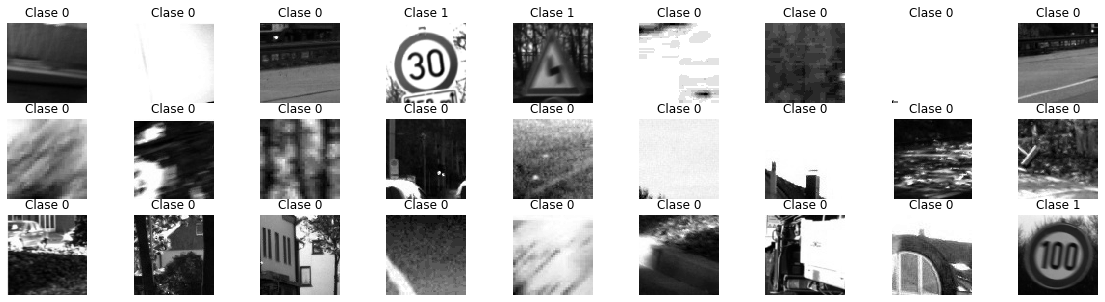

In [9]:
numImgs = image_data_test.shape[0]
numPicle = 9 # More than 9 doesn't work so be carefull
randImgs = np.random.choice(numImgs, size=numPicle, replace=False)
selectedImgsTrain = image_data_train[randImgs]
selectedImgsVal = image_data_val[randImgs]
selectedImgsTest = image_data_test[randImgs]
selectedClassTrain = class_name_train[randImgs]
selectedClassVal = class_name_val[randImgs]
selectedClassTest = class_name_test[randImgs]
fig, axes = plt.subplots(3,numPicle, figsize=(20,5))
# fig.suptitle("TRAIN | VAL | TEST", fontsize=16)
for i in range(numPicle):
    if color:
        axes[0,i].imshow(selectedImgsTrain[i,:,:,::-1])
        axes[0,i].set_title("Clase %d" %selectedClassTrain[i])
        axes[1,i].imshow(selectedImgsVal[i,:,:,::-1])
        axes[1,i].set_title("Clase %d" %selectedClassVal[i])
        axes[2,i].imshow(selectedImgsTest[i,:,:,::-1])
        axes[2,i].set_title("Clase %d" %selectedClassTest[i])
    else:
        axes[0,i].imshow(selectedImgsTrain[i], cmap=plt.cm.gray)
        axes[0,i].set_title("Clase %d" %selectedClassTrain[i])
        axes[1,i].imshow(selectedImgsVal[i], cmap=plt.cm.gray)
        axes[1,i].set_title("Clase %d" %selectedClassVal[i])
        axes[2,i].imshow(selectedImgsTest[i], cmap=plt.cm.gray)
        axes[2,i].set_title("Clase %d" %selectedClassTest[i])
    axes[0,i].axis('off')
    axes[1,i].axis('off')
    axes[2,i].axis('off')
    

### Calculo de features de HOG
Calculamos las caraterísticas de HOG de los tres datasets. Esta vez el número de Bins va a ser 31 en vez de 9.

In [10]:
# Obtenemos los histogramas y las imagenes pasadas por HOG
hogImg_hist_train = getHOG(image_data_train, nBins=31)
hogImg_hist_val = getHOG(image_data_val, nBins=31)
hogImg_hist_test = getHOG(image_data_test, nBins=31)


### Estandarización de datos <u style="color: red;">(no se usa)
Antes de entrenar a cualquier modelo estandarizamos los datos.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# MinMaxScalerHogFeat = MinMaxScaler()
# hogImg_hist_train = MinMaxScalerHogFeat.fit_transform(hogImg_hist_train)

# hogImg_hist_val = MinMaxScalerHogFeat.transform(hogImg_hist_val)
# hogImg_hist_test = MinMaxScalerHogFeat.transform(hogImg_hist_test)


---
## MODELOS


Antes de pasar la detección de señales en una imágen, necesitamos tener un modelo que clasifique entre SI señal y NO señal. Para eso probamos algunos de los tipos de modelos de la fase 1 y al igual que antes seleccionamos el que mejor generaliza.

### Entrenamiento de un modelo SVM
Se hace uso de un modelo SVM para el entrenamiento.

In [59]:
from sklearn import svm

clf_SD = svm.SVC(kernel='linear', C=100, gamma=0.1, max_iter = 1000, probability=True)
%time clf_SD.fit(hogImg_hist_train, class_name_train)

Wall time: 2min 23s


C:\Users\adria\Miniconda3\envs\py37vision\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=100, gamma=0.1, kernel='linear', max_iter=1000, probability=True)

Ahora probamos el modelo con los datasets de `train`, `validación` y `test` para ver los resultados. Pero antes estandarizamos los datos de `validación` y `test`

In [60]:
%time accTrain = clf_SD.score(hogImg_hist_train, class_name_train)
%time accVal = clf_SD.score(hogImg_hist_val, class_name_val)
%time accTest = clf_SD.score(hogImg_hist_test, class_name_test)


Wall time: 24.5 s
Wall time: 5.26 s
Wall time: 5.26 s


In [61]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9953325554259043
Test:    0.9953325554259043


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [62]:
from joblib import dump, load
from datetime import datetime
dump(clf_SD, 'Modelos/model_SVM_TSD%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_SVM_TSD06_01_2021_20-07-50.joblib']

###  Entrenamiento de un modelo NN  

Se hace uso de un modelo NN para el entrenamiento.

In [31]:
from sklearn.neural_network import MLPClassifier

clf_SD = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(16, 32, 64), random_state=1)
%time clf_SD.fit(hogImg_hist_train, class_name_train)


Wall time: 1min 42s


MLPClassifier(alpha=0.01, hidden_layer_sizes=(16, 32, 64), random_state=1)

In [32]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SD.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SD.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SD.predict(hogImg_hist_test), class_name_test)


Wall time: 1.29 s
Wall time: 315 ms
Wall time: 351 ms


In [33]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9964306960142773
Test:    0.9982153480071386


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [66]:
from joblib import dump, load
from datetime import datetime
dump(clf_SD, 'Modelos/model_NN_TSD%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_NN_TSD06_01_2021_20-09-52.joblib']

###  Entrenamiento de un modelo Random Forest  

Se hace uso de un modelo Random Forest para el entrenamiento.

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf_SD = RandomForestClassifier(criterion='gini', n_estimators=150)
%time clf_SD.fit(hogImg_hist_train, class_name_train)

Wall time: 1min 33s


RandomForestClassifier(n_estimators=150)

In [68]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SD.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SD.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SD.predict(hogImg_hist_test), class_name_test)


Wall time: 537 ms
Wall time: 136 ms
Wall time: 122 ms


In [69]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9918319719953326
Test:    0.9929988331388565


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [70]:
from joblib import dump, load
from datetime import datetime
dump(clf_SD, 'Modelos/model_RF_TSD%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_RF_TSD06_01_2021_20-11-36.joblib']

###  Entrenamiento de un modelo OVA

Se hace uso de un modelo OVA para el entrenamiento.

In [71]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Se llama al constructor de OVA utilizando SVM como clasificador base
clf_SD = OneVsRestClassifier(SVC(kernel='linear', C=100, gamma=0.1, max_iter = 1000, probability=True))
# Se entrena el modelo OVA
%time clf_SD.fit(hogImg_hist_train, class_name_train)

Wall time: 2min 25s


C:\Users\adria\Miniconda3\envs\py37vision\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


OneVsRestClassifier(estimator=SVC(C=100, gamma=0.1, kernel='linear',
                                  max_iter=1000, probability=True))

In [72]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SD.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SD.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SD.predict(hogImg_hist_test), class_name_test)


Wall time: 26.6 s
Wall time: 5.79 s
Wall time: 5.38 s


In [73]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9953325554259043
Test:    0.9953325554259043


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [74]:
from joblib import dump, load
from datetime import datetime
dump(clf_SD, 'Modelos/model_OVA_TSD%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_OVA_TSD06_01_2021_20-18-34.joblib']

###  Entrenamiento de un modelo Decision Tree

Se hace uso de un modelo Decision Tree para el entrenamiento.

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Se llama al constructor de OVA utilizando SVM como clasificador base
clf_SD = DecisionTreeClassifier(criterion='entropy', random_state=1)
# Se entrena el modelo OVA
%time clf_SD.fit(hogImg_hist_train, class_name_train)

Wall time: 1min 32s


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [76]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SD.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SD.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SD.predict(hogImg_hist_test), class_name_test)


Wall time: 260 ms
Wall time: 62 ms
Wall time: 49 ms


In [77]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   1.0
Val:     0.9603267211201867
Test:    0.9626604434072346


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [78]:
from joblib import dump, load
from datetime import datetime
dump(clf_SD, 'Modelos/model_DT_TSD%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_DT_TSD06_01_2021_20-20-36.joblib']

###  Entrenamiento de un modelo Naïve-Bayes

Se hace uso de un modelo Naïve-Bayes para el entrenamiento.

In [79]:
from sklearn import naive_bayes
# Se llama al constructor de OVA utilizando SVM como clasificador base
clf_SD = naive_bayes.GaussianNB()
# Se entrena el modelo
%time clf_SD.fit(hogImg_hist_train, class_name_train)

Wall time: 1.59 s


GaussianNB()

In [80]:
from sklearn import metrics
%time accTrain = metrics.accuracy_score(clf_SD.predict(hogImg_hist_train), class_name_train)
%time accVal = metrics.accuracy_score(clf_SD.predict(hogImg_hist_val), class_name_val)
%time accTest = metrics.accuracy_score(clf_SD.predict(hogImg_hist_test), class_name_test)


Wall time: 2.19 s
Wall time: 457 ms
Wall time: 358 ms


In [81]:
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


Porcentajes de acierto del modelo
Train:   0.9374061091637457
Val:     0.9369894982497082
Test:    0.9381563593932322


### Guardado del modelo
Se guarda el modelo actual, que será un fichero unico de tipo `joblib` con la fecha y la hora.

In [82]:
from joblib import dump, load
from datetime import datetime
dump(clf_SD, 'Modelos/model_GNB_TSD%s.joblib' % datetime.now().strftime("%d_%m_%Y_%H-%M-%S"))


['Modelos/model_GNB_TSD06_01_2021_20-20-41.joblib']

###  Entrenamiento de un modelo CNN  

Se hace uso de un modelo CNN para el entrenamiento.

In [17]:
CNN_train_imgs = np.copy(image_data_train)
CNN_val_imgs = np.copy(image_data_val)
CNN_test_imgs = np.copy(image_data_test)
if color == False:
    CNN_train_imgs = CNN_train_imgs.reshape(np.hstack((CNN_train_imgs.shape, 1)))
    CNN_val_imgs = CNN_val_imgs.reshape(np.hstack((CNN_val_imgs.shape, 1)))
    CNN_test_imgs = CNN_test_imgs.reshape(np.hstack((CNN_test_imgs.shape, 1)))

In [18]:
import importlib.util
 
if importlib.util.find_spec('tensorflow') is None:
    !pip install tensorflow
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
 
num_classes = 2
num_rgb = len(CNN_train_imgs[0].shape)
 
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=CNN_train_imgs[0].shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
  layers.Dense(num_classes)
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 83, 83, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 83, 83, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 41, 41, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
%time history = model.fit(CNN_train_imgs, class_name_train, epochs=10, validation_data=(CNN_val_imgs, class_name_val))

Epoch 1/10
491/491 [==============================] - 113s 230ms/step - loss: 0.4316 - accuracy: 0.9452 - val_loss: 0.1523 - val_accuracy: 0.9676
Epoch 2/10
491/491 [==============================] - 109s 221ms/step - loss: 0.2117 - accuracy: 0.9597 - val_loss: 0.1030 - val_accuracy: 0.9801
Epoch 3/10
491/491 [==============================] - 112s 229ms/step - loss: 0.1713 - accuracy: 0.9620 - val_loss: 0.1165 - val_accuracy: 0.9682
Epoch 4/10
491/491 [==============================] - 117s 239ms/step - loss: 0.1582 - accuracy: 0.9626 - val_loss: 0.0836 - val_accuracy: 0.9819
Epoch 5/10
491/491 [==============================] - 126s 258ms/step - loss: 0.1452 - accuracy: 0.9654 - val_loss: 0.0865 - val_accuracy: 0.9780
Epoch 6/10
491/491 [==============================] - 111s 225ms/step - loss: 0.1440 - accuracy: 0.9651 - val_loss: 0.0781 - val_accuracy: 0.9854
Epoch 7/10
491/491 [==============================] - 105s 215ms/step - loss: 0.1433 - accuracy: 0.9640 - val_loss: 0.0793 -

491/491 - 33s - loss: 0.0522 - accuracy: 0.9888
Wall time: 32.7 s
106/106 - 7s - loss: 0.0497 - accuracy: 0.9890
Wall time: 7.14 s
106/106 - 7s - loss: 0.0595 - accuracy: 0.9863
Wall time: 7 s
Porcentajes de acierto del modelo
Train:   0.9887783527374268
Val:     0.9889946579933167
Test:    0.9863176941871643


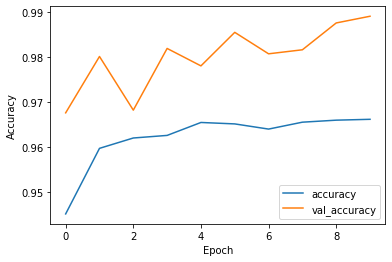

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

%time lossTrain, accTrain = model.evaluate(CNN_train_imgs,  class_name_train, verbose=2)
%time lossVal, accVal = model.evaluate(CNN_val_imgs,  class_name_val, verbose=2)
%time lossTest, accTest = model.evaluate(CNN_test_imgs,  class_name_test, verbose=2)
print("Porcentajes de acierto del modelo")
print("Train:  ", accTrain)
print("Val:    ", accVal)
print("Test:   ", accTest)


## <u>Conclusión</u>

​	Ya que los porcentajes de acierto en validación de los modelos SVM, OVA y NN son los mismos, escogemos la NN por ser la más rápida clasificando. Al igual que antes, vamos a entrenar esta NN con todos los datos.

In [11]:
import glob
from joblib import dump, load
modelo_NN = glob.glob(r"Modelos/model_NN_TSD*")[-1] # Cogemos el último de los posibles
clf_SD = load(modelo_NN)

X = np.vstack((hogImg_hist_train, hogImg_hist_val, hogImg_hist_test))
y = np.hstack((class_name_train, class_name_val, class_name_test))

clf_SD.fit(X,y)
accTrain = metrics.accuracy_score(clf_SD.predict(X), y)
print("Precision modelo training: %f"%accTrain)

Precision modelo training: 1.000000


### <u>PROBANDO DISTINTOS METODOS DE DETECCIÓN

Aunque en el enunciado del problema a tratar se propone un algoritmo de ventana deslizante para la detección de señales en la imagen, aquí se propone, además de ésta, otro metodo diferente que será explicado más adelante.

### Ventana deslizante
Aquí se intenta solucionar el problema mediante un algoritmo de ventana deslizante. Se utilizan 4 tamaños diferentes de ventana con un desplazamiento de diferentes tamaños, para evitar ralentizar demasiado el proceso. 

In [ ]:
import cv2
import numpy as np
import glob
import random

imgSizeH = 83
imgSizeW = 83
confThres = 0.7
nmsThres = 0.1

winSizes = [[128,64], #[Tamaño ,step]
            [96, 48],
            [64, 32],
            [32, 16]]

colores = [(0,128,128),
           (0,0,255),
           (0,255,255),
           (128,255,0)]

# Establecemos la ruta de las imagenes con las que probar
images_path = glob.glob(r"Dataset_images_test/*")

# Ordenamos de manera aleatoria
random.shuffle(images_path)

# Para todas las imágenes
for nImg, img_path in enumerate(images_path): # Solo para unas pocas pues el algoritmo es lento

    image = cv2.imread(img_path)  # Cargamos la imagen de entrada.
    b_boxes, confidences = [], []
    for c, (size, step) in enumerate(winSizes):
        color = colores[c]
        print(size, step)
        for i in range(0,image.shape[0],step//2):
            for j in range(0,image.shape[1],step):
                window = image[i:i+size, j:j+size]
                if window.shape[0] != size or window.shape[1] != size:
                    continue # Si la ventana no es del tamaño que queremos ignoramos
                window = cv2.resize(window, (imgSizeH, imgSizeW), interpolation = cv2.INTER_AREA)
                grayImg = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
                hog = getHOG(grayImg,nBins=31)
                pred = clf_SD.predict_proba(hog)
                if pred[0,1] > confThres:
                    b_boxes.append([j, i, int(size), int(size)])
                    confidences.append(float(pred[0,1]))

    # Utilizamos la función de Supresión de No Máximos de cv2
    indices = cv2.dnn.NMSBoxes(b_boxes, confidences, confThres, nmsThres)
    for i in range(len(b_boxes)):
        if i in indices:
            x, y, w, h = b_boxes[i]
            conf = confidences[i]
            # Imprimimos en la imagen el mejor rectangulo con un texto marcando la confianza
            cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,255), 2)
            cv2.putText(image, "Signal [%.2f]"%conf, (x - 5, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.75, (255,0,255), 2)
    cv2.imwrite("results_vd/imagen_%d.jpg"%nImg, image)
#     cv2.imshow("Imagen %d"%i, image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()


Como se puede observar, los resultados son bastante mediocres. Al no conseguir corregir tantos errores, se propone lo siguiente.

### Máscaras de color y Canny

La idea principal de este método es la de utilizar los colores que más se repiten en las señales de tráfico (azul, rojo, amarillo, ...) junto con la detección de bordes de Canny (para las señales monocromáticas) para luego hacer uso de un MSER para extraer puntos de interes. Esto permite deshacerse de regiones sin importancia de la imágen, aumentando considerablemente la velocidad de procesamiento y detección.

Primero definimos una función que extraerá, del rango HSV de una imágen, las máscaras de los colores rojo, azul y amarillo.

In [12]:
def signalColorMask(image):
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Máscara amarillo
    lower_yellow = np.array([0, 100, 20])
    upper_yellow = np.array([70, 255, 255])
    mask0 = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

    # Máscara rojo
    # Rango bajo para rojo
    lower_red = np.array([0,100,20])
    upper_red = np.array([10,255,255])
    mask1_1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # Rango alto para rojo
    lower_red = np.array([140,100,20])
    upper_red = np.array([255,255,255])
    mask1_2 = cv2.inRange(img_hsv,lower_red,upper_red)
    mask1 = mask1_1+mask1_2

    # Máscara azul
    lower_blue = np.array([100,100,20])
    upper_blue = np.array([140,255,255])
    mask2 = cv2.inRange(img_hsv, lower_blue, upper_blue)

    # Juntamos las máscaras
    mask = mask0+mask1+mask2
    
    return mask

Después de esto, juntamos esta máscara con la imagen sacada por el detector de bordes de Canny y utilizamos un detecto MSER para sacar los puntos de interes.

In [14]:
# Importamos las librerías necesarias
import cv2
import numpy as np
import glob
import random


imgSizeH = 83
imgSizeW = 83 
confThres = 0.8
nmsThres = 0.2

# Establecemos la ruta de las imagenes con las que probar
images_path = glob.glob(r"Dataset_images_test/*")
random.shuffle(images_path)

# Para todas las imágenes
for nImg, img_path in enumerate(images_path):

    image = cv2.imread(img_path)  # Cargamos la imagen de entrada.
    original = image.copy()  # Hacemos una copia de la imagen, puesto que haremos cambios en la original
    print("********** %s ***********"%img_path)
    
    # Equalizamos la imagen para mejorar el proceso de la máscara y de Canny
    img_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    image = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    
    # Obtenemos la imagen en escala de grises y la mascara de colores de señales
    grayImg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = signalColorMask(image)

    # Obtenemos los bordes de la imagen por medio de Canny
    imgGry = cv2.Canny(grayImg,20,200,True)
    
    
    # Para imprimir mas adelante las imagenes
    maskPrint = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
    imagePrint = maskPrint + cv2.cvtColor(imgGry,cv2.COLOR_GRAY2RGB)
    
    # Instanciamos el detector MSER
    detector = cv2.MSER_create(0)

    # Aplicamos el detector MSER sobre la mascara y sobre la imagen de bordes
    keypoints = detector.detect(mask)
    keypoints = np.hstack((keypoints, detector.detect(imgGry)))
    
    b_boxes, confidences = [], []

    for keypoint in keypoints:
        r = int(keypoint.size)
        x, y = np.int64(keypoint.pt)
        if x-r<0 or y-r<0 or x+r>grayImg.shape[1] or y+r>grayImg.shape[0]:
            continue
        cv2.rectangle(imagePrint, (x-r, y-r), (x+r, y+r), (255,0,255), 2)
        img = cv2.resize(grayImg[y-r:y+r,x-r:x+r], (imgSizeH, imgSizeW), interpolation = cv2.INTER_AREA)
        hog = getHOG(img, nBins=31)
        pred = clf_SD.predict_proba(hog)

        if pred[0,1] >= confThres:
            x = int(x - r)
            y = int(y - r)
            b_boxes.append([x, y, int(r*2), int(r*2)])
            confidences.append(float(pred[0,1]))

    # Utilizamos la función de Supresión de No Máximos de cv2
    indices = cv2.dnn.NMSBoxes(b_boxes, confidences, confThres, nmsThres)

    for i in range(len(b_boxes)):
        if i in indices:
            x, y, w, h = b_boxes[i]
            conf = confidences[i]
            
            # Si se quiere usar HOG con modelo sklearn descomentar estas líneas
            img = cv2.cvtColor(original[y:y+h,x:x+w], cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (imgSizeH, imgSizeW), interpolation = cv2.INTER_AREA)
            hog = getHOG(img, nBins=9)
            label = "Signal"

            cv2.rectangle(original, (x, y), (x + w, y + h), (255,0,255), 2)
            cv2.putText(original, "%s [%.2f]"%(label,conf), (x - 5, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.75, (255,0,255), 2)

#     cv2.imwrite("results_mser_ns/imagen_%d.jpg"%nImg, original)
    # Mostramos la imagen original junto con la mascara + Canny y los .
    cv2.imshow('Imagen', cv2.resize(np.vstack((original, imagePrint)), (816, 960), interpolation = cv2.INTER_AREA))
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

********** Dataset_images_test\00340.png ***********
********** Dataset_images_test\00320.png ***********
********** Dataset_images_test\00563.png ***********
********** Dataset_images_test\00409.png ***********
********** Dataset_images_test\00330.png ***********
********** Dataset_images_test\00309.png ***********
********** Dataset_images_test\00574.png ***********
********** Dataset_images_test\00316.png ***********
********** Dataset_images_test\00232.png ***********
********** Dataset_images_test\00466.png ***********
********** Dataset_images_test\00456.png ***********
********** Dataset_images_test\00417.png ***********
********** Dataset_images_test\00521.png ***********
********** Dataset_images_test\00419.png ***********
********** Dataset_images_test\00411.png ***********
********** Dataset_images_test\00326.png ***********
********** Dataset_images_test\00464.png ***********
********** Dataset_images_test\00335.png ***********
********** Dataset_images_test\00515.png *****

Como se puede observar, los resultados son bastante mejores que en el algoritmo de ventana deslizante. Es por eso mismo que se utiliza este metodo para la fase siguiente.

---
## PARTE 3:


En esta última parte se juntan las dos partes anteriores. Mediante el modelo elegido en la fase 1 y el metodo de detección de señales de la fase 2, se marcarán y clasificarán las señales en las imágenes de entrada.

El código es exactamente el mismo pero con el añadido de la clasificación de señal en el bucle de las b_boxes del final.

In [25]:
# Importamos las librerías necesarias
import cv2
import numpy as np
import glob
import random

imgSizeH = 83
imgSizeW = 83 
confThres = 0.8
nmsThres = 0.2

# Nombres de las clases
classes = np.loadtxt("class_names.txt", dtype=str, delimiter='\n')

# Colores para cada clase
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# images_path = glob.glob(r"Dataset_images_test/*")
random.shuffle(images_path)

# Para todas las imágenes
for nImg, img_path in enumerate(images_path):

    image = cv2.imread(img_path)  # Cargamos la imagen de entrada.
    original = image.copy()  # Hacemos una copia de la imagen, puesto que haremos cambios en la original
    print("********** %s ***********"%img_path)
    
    # Equalizamos la imagen para mejorar el proceso de la máscara y de Canny
    img_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    image = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    
    # Obtenemos la imagen en escala de grises y la mascara de colores de señales
    grayImg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = signalColorMask(image)

    # Obtenemos los bordes de la imagen por medio de Canny
    imgGry = cv2.Canny(grayImg,20,200,True)
    
    # Para imprimir mas adelante las imagenes
    maskPrint = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
    imagePrint = maskPrint + cv2.cvtColor(imgGry,cv2.COLOR_GRAY2RGB)
    
    # Instanciamos el detector MSER
    detector = cv2.MSER_create(0)

    # Aplicamos el detector MSER sobre la mascara y sobre la imagen de bordes
    keypoints = detector.detect(mask)
    keypoints = np.hstack((keypoints, detector.detect(imgGry)))
    
    b_boxes, confidences = [], []

    for keypoint in keypoints:
        r = int(keypoint.size)
        x, y = np.int64(keypoint.pt)
        if x-r<0 or y-r<0 or x+r>grayImg.shape[1] or y+r>grayImg.shape[0]:
            continue
        cv2.rectangle(imagePrint, (x-r, y-r), (x+r, y+r), (255,0,255), 2)
        img = cv2.resize(grayImg[y-r:y+r,x-r:x+r], (imgSizeH, imgSizeW), interpolation = cv2.INTER_AREA)
        hog = getHOG(img, nBins=31)
        pred = clf_SD.predict_proba(hog)

        if pred[0,1] >= confThres:
            x = int(x - r)
            y = int(y - r)
            b_boxes.append([x, y, int(r*2), int(r*2)])
            confidences.append(float(pred[0,1]))

    # Utilizamos la función de Supresión de No Máximos de cv2
    indices = cv2.dnn.NMSBoxes(b_boxes, confidences, confThres, nmsThres)

    for i in range(len(b_boxes)):
        if i in indices:
            x, y, w, h = b_boxes[i]
            conf = confidences[i]
            
            # Si se quiere usar HOG con modelo sklearn descomentar estas líneas
            img = cv2.cvtColor(original[y:y+h,x:x+w], cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (imgSizeH, imgSizeW), interpolation = cv2.INTER_AREA)
            hog = getHOG(img, nBins=9)
            
            # Parte de clasificación de señal
            pred = clf_SC.predict(hog)
            label = str(classes[pred])
            
            color = colors[pred].flatten()
            
            print("%d | %s"%(pred,label))
            cv2.rectangle(original, (x, y), (x + w, y + h), color, 2)
            cv2.putText(original, "%s [%.2f]"%(label,conf), (x - 5, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.75, color, 2)
    

    # Mostramos la imagen original junto con la mascara + Canny y los .
    cv2.imshow('Imagen', cv2.resize(np.vstack((original, imagePrint)), (816, 960), interpolation = cv2.INTER_AREA))
    
    # cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00230.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00019.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00111.ppm ***********
7 | ['speed limit 100']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00180.ppm ***********
40 | ['roundabout']
33 | ['go right']
8 | ['speed limit 120']
31 | ['animals']
3 | ['speed limit 60']
25 | ['construction']
12 | ['priority road']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00253.ppm ***********
5 | ['speed limit 80']
38 | ['keep right']
40 | ['roundabout']
33 | ['go right']
13 | ['give way']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00266.ppm ***********
10 | ['no overtaking (trucks)']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00275.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00099.ppm ***********
1 | ['spee

1 | ['speed limit 30']
2 | ['speed limit 50']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00091.ppm ***********
4 | ['speed limit 70']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00045.ppm ***********
38 | ['keep right']
1 | ['speed limit 30']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00284.ppm ***********
4 | ['speed limit 70']
10 | ['no overtaking (trucks)']
38 | ['keep right']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00262.ppm ***********
7 | ['speed limit 100']
33 | ['go right']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00153.ppm ***********
38 | ['keep right']
10 | ['no overtaking (trucks)']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00124.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00224.ppm ***********
15 | ['no traffic both ways']
8 | ['speed limit 120']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013

8 | ['speed limit 120']
15 | ['no traffic both ways']
3 | ['speed limit 60']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00066.ppm ***********
13 | ['give way']
6 | ['restriction ends 80']
5 | ['speed limit 80']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00226.ppm ***********
15 | ['no traffic both ways']
13 | ['give way']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00034.ppm ***********
2 | ['speed limit 50']
26 | ['traffic signal']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00199.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00096.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00143.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00295.ppm ***********
4 | ['speed limit 70']
4 | ['speed limit 70']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00148.ppm ***********
12 | ['priority road']
32

2 | ['speed limit 50']
2 | ['speed limit 50']
9 | ['no overtaking']
9 | ['no overtaking']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00115.ppm ***********
38 | ['keep right']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00068.ppm ***********
2 | ['speed limit 50']
26 | ['traffic signal']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00025.ppm ***********
2 | ['speed limit 50']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00060.ppm ***********
7 | ['speed limit 100']
9 | ['no overtaking']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00238.ppm ***********
2 | ['speed limit 50']
2 | ['speed limit 50']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00058.ppm ***********
3 | ['speed limit 60']
2 | ['speed limit 50']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00286.ppm ***********
4 | ['speed limit 70']
9 | ['no overtaking']
********** C:\Users\adria\Downloads

8 | ['speed limit 120']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00017.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00112.ppm ***********
9 | ['no overtaking']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00038.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00270.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00204.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00155.ppm ***********
1 | ['speed limit 30']
38 | ['keep right']
8 | ['speed limit 120']
12 | ['priority road']
38 | ['keep right']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00282.ppm ***********
5 | ['speed limit 80']
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00084.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00252.ppm ***********
29 | ['cycles crossing']
15 | ['no traffic both

## Implementación adicional de red YOLO v3

En este apartado se usa una red Darknet YOLOv3 entrenada en los servidores de Google Colaboratory, mediante el uso de sus frameworks de GPU con el dataset de entrenamiento TrainIJCNN2013 obtenido en https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/published-archive.html", haciendo uso del fichero `gt.txt` que tiene las coordenadas de las señales y la clase a la que pertenecen. Hizo falta transformar estos datos para adaptarlos a YOLO. Está disponible en la carpeta `YOLO_v3` el notebook de Jupyter con el código de entrenamiento del modelo, además del código que transforma los datos mencionados anteriormente.

In [27]:
import cv2
import numpy as np
import glob
import random

confThres = 0.3
nmsThres = 0.4

# Creamos la red con los pesos entrenados y la configuración para test
net = cv2.dnn.readNet("YOLO_v3/yolov3_training_final.weights", "YOLO_v3/yolov3_testing.cfg")

classes = np.loadtxt("class_names.txt", dtype=str, delimiter='\n')

# Images path
# images_path = glob.glob(r"Dataset_images_test/*")
images_path = glob.glob(r"C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\*")

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Colores para cada clase
colors = np.random.uniform(0, 255, size=(len(classes), 3))

random.shuffle(images_path)
# Para todas las imágenes
for nImg, img_path in enumerate(images_path):

    img = cv2.imread(img_path)
    orig = img.copy()
    img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    img = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    print("********** %s ***********"%img_path)
    height, width, channels = img.shape
    
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:

                print(str(classes[class_id]))
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, confThres, nmsThres)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]

            conf = confidences[i]
            cv2.rectangle(orig, (x, y), (x + w, y + h), color, 2)
            cv2.putText(orig, "%s [%.2f]"%(label,conf), (x, y), font, 0.5, color, 2)
    cv2.imwrite("results_yolo/imagen_%i.jpg"%nImg, orig)
#     cv2.imshow('Imagen', orig)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00085.ppm ***********
keep right
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00146.ppm ***********
speed limit 120
speed limit 120
no overtaking (trucks)
no overtaking (trucks)
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00112.ppm ***********
no overtaking
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00087.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00256.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00259.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00103.ppm ***********
speed limit 50
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00187.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00282.ppm ***********
speed limit 60
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00206.ppm ***********
*******

keep right
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00188.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00181.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00291.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00175.ppm ***********
speed limit 30
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00205.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00009.ppm ***********
speed limit 70
speed limit 30
speed limit 30
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00027.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00230.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00270.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00238.ppm ***********
speed limit 50
********** C:\Users\adria\Downloads\TestIJCNN2013\Test

********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00136.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00242.ppm ***********
stop
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00073.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00098.ppm ***********
speed limit 30
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00137.ppm ***********
give way
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00079.ppm ***********
stop
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00212.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00215.ppm ***********
no entry
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00266.ppm ***********
speed limit 50
no overtaking
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00052.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\0026

********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00114.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00252.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00237.ppm ***********
danger
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00251.ppm ***********
speed limit 30
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00093.ppm ***********
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00294.ppm ***********
priority road
speed limit 70
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00236.ppm ***********
give way
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00250.ppm ***********
speed limit 30
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00260.ppm ***********
speed limit 50
********** C:\Users\adria\Downloads\TestIJCNN2013\TestIJCNN2013\00207.ppm ***********
priority at next intersection
********** C:\Users\